# The data used for this project's exploratory data analysis has been sourced from:

1) National Highway Traffic Safety Administration API (US data) (https://crashviewer.nhtsa.dot.gov/CrashAPI), all NHTSA files are also available to download in CSV form at (https://www.nhtsa.gov/file-downloads?p=nhtsa/downloads/FARS/2021/National/). 

## Data cleansing of the National Highway Traffic Safety Administration API (US data):

In [64]:
# importing dependencies
import hvplot.pandas
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import json
import csv
from cartopy import crs
import geoviews as gv

In [65]:
# Import CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020.head()

,caseyear,state,st_case,statename,ve_total,ve_forms,pvh_invl,peds,pernotmvit,permvit,...,cf2,cf2name,cf3,cf3name,fatals,drunk_dr,age,speed_limit,race,vehicle_make
0,2020,1,10001,Alabama,1,1,0,0,0,4,...,NaN,NaN,NaN,NaN,3,1,24.0,45.0,Black or African American,Lexus
1,2020,1,10002,Alabama,4,4,0,0,0,6,...,NaN,NaN,NaN,NaN,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet
2,2020,1,10003,Alabama,2,2,0,0,0,2,...,NaN,NaN,NaN,NaN,1,0,34.0,65.0,White,Toyota
3,2020,1,10004,Alabama,1,1,0,0,0,5,...,NaN,NaN,NaN,NaN,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai
4,2020,1,10005,Alabama,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,1,0,47.0,45.0,White,GMC


In [66]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus in this exploration stage. 
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr", "age", "speed_limit", "race", "vehicle_make"]]
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,longitud,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,-86.369642,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC


In [67]:
# Dropping NaN rows. 
Cleaned_df = Cleaned_df.dropna(how="any")
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,longitud,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24.0,45.0,Black or African American,Lexus
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40.0,35.0,Not a Fatality (not Applicable),Chevrolet
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,-86.369642,Ditch,Daylight,Rain,1,0,34.0,65.0,White,Toyota
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0,17.0,35.0,Not a Fatality (not Applicable),Hyundai
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47.0,45.0,White,GMC


In [68]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
age             float64
speed_limit     float64
race             object
vehicle_make     object
dtype: object

In [69]:
# Converting the age column from float to integer.
Cleaned_df = Cleaned_df.astype({"age":"int", 
                                 "speed_limit":"int"})
Cleaned_df.head()

,caseyear,st_case,statename,persons,countyname,monthname,day_week,hour,rur_urbname,routename,...,longitud,harm_evname,lgt_condname,weathername,fatals,drunk_dr,age,speed_limit,race,vehicle_make
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,-86.369642,Ditch,Daylight,Rain,1,0,34,65,White,Toyota
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC


In [70]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visability", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"
                                                  , "age":"Age", "speed_limit":"Speed_Limit", "race":"Race", "vehicle_make": "Vehicle_Make"})
Cleaned_df.head()

,Year,Case_ID,State,Person_Count,County,Month,Day_Name,Hour,Rural_Urban,Route_Name,...,Longitude,Harm_Event,Visability,Weather_Condition,Fatality_Count,Drunk_Driver_Count,Age,Speed_Limit,Race,Vehicle_Make
0,2020,10001,Alabama,4,ELMORE (51),January,4,2,Rural,County Road,...,-86.094850,Tree (Standing Only),Dark - Not Lighted,Clear,3,1,24,45,Black or African American,Lexus
1,2020,10002,Alabama,6,JEFFERSON (73),January,5,17,Urban,Local Street - Municipality,...,-86.839544,Motor Vehicle In-Transport,Dark - Lighted,Rain,1,0,40,35,Not a Fatality (not Applicable),Chevrolet
2,2020,10003,Alabama,2,SHELBY (117),January,5,14,Rural,State Highway,...,-86.369642,Ditch,Daylight,Rain,1,0,34,65,White,Toyota
3,2020,10004,Alabama,5,CALHOUN (15),January,6,15,Rural,County Road,...,-85.883486,Tree (Standing Only),Daylight,Cloudy,1,0,17,35,Not a Fatality (not Applicable),Hyundai
4,2020,10005,Alabama,1,COOSA (37),January,7,0,Rural,County Road,...,-86.083547,Tree (Standing Only),Dark - Not Lighted,Rain,1,0,47,45,White,GMC


In [71]:
accident_map = Cleaned_df.hvplot.points("Longitude", "Latitude", geo=True, xlabel="Longitude", ylabel="Latitude",
                                     tiles="OSM", title="Map of Accidents", color="red", alpha=0.1,
                                    hover_cols = ["State", "County"])
accident_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,County)

In [73]:
# calculating the mean
mean_age = round(Cleaned_df['Age'].mean())

# calculating the mode
mode_age = round(Cleaned_df['Age'].mode().values[0])

# calculating the median
median_age = round(Cleaned_df['Age'].median())

print("The Mean Age of drivers in accidents is", mean_age)
print("The Mode Age of drivers in accidents is", mode_age)
print("The Median Age of drivers in accidents is", median_age)

The Mean Age of drivers in accidents is 51
The Mode Age of drivers in accidents is 28
The Median Age of drivers in accidents is 40


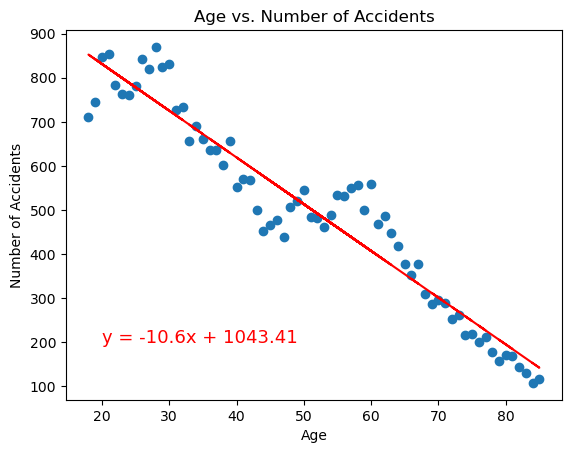

The correlation coefficient between age and the number of accidents is -0.96


In [63]:
# Group the data by 'Age' and count the number of accidents
Cleaned_df = Cleaned_df[Cleaned_df['Age'] <= 85]
Cleaned_df = Cleaned_df[Cleaned_df['Age'] >= 18]
age_counts = Cleaned_df['Age'].value_counts()

# Extract the ages and corresponding counts
ages = age_counts.index
accident_counts = age_counts.values

x_values = ages
y_values = accident_counts
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.title('Age vs. Number of Accidents')
plt.annotate(line_eq,(20,200),fontsize=13,color="red")
plt.savefig("output_data/age_scatter.png")
plt.show()

print(f"The correlation coefficient between age and the number of accidents is {round(st.pearsonr(ages, accident_counts)[0],2)}")

In [ ]:
# bin and label ages - bar chart or ppie chart of %s

## API Consideration